Single(simple) Exponential smoothing uses a weighted moving average with exponentially decreasing weights.

Double Exponential Smoothing(DWA) is also called as Holts Double Exponential Smoothing.Double Exponential Smoothing is extended form of Simple Exponential Smoothing. Double Exponential Smoothing technique is used for forecasting with trending data.It has level and trend but it does not have seasonality

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesis1/Data Training.xlsx
/kaggle/input/tesis1/salus72.csv


In [7]:
header_list = ["jumlah_ikan","kurs_rp"]
df = pd.read_csv("../input/tesis1/salus72.csv",header = None,names = header_list)

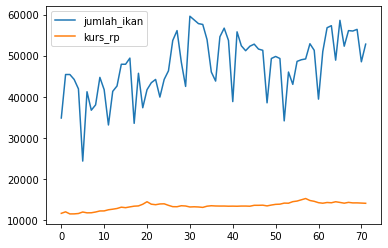

In [8]:
df.plot()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   jumlah_ikan  72 non-null     int64
 1   kurs_rp      72 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB


In [10]:
df.drop('kurs_rp',axis = 1, inplace = True)

In [11]:
len(df)

72

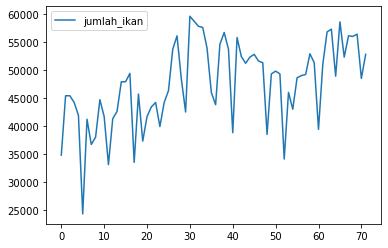

In [12]:
df.plot()

In [13]:
df[['jumlah_ikan']]

,jumlah_ikan
0,34800
1,45400
2,45400
3,44200
4,41900
...,...
67,56100
68,56000
69,56400
70,48500


In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing 
import matplotlib.pyplot as plt

In [15]:
ses = SimpleExpSmoothing(df).fit(smoothing_level=0.6,optimized=False)
exps = ses.fittedvalues

In [16]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [17]:
dblExp = Holt(df).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
dexps = dblExp.fittedvalues

In [18]:
df['exps'] = exps
df['desps'] = dexps

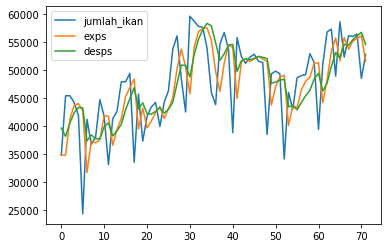

In [19]:
df.plot()

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def prettyprint(result):
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [22]:
resultRaw = adfuller(df.jumlah_ikan)
prettyprint(resultRaw)

ADF Statistic: -1.630528
p-value: 0.467214
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [23]:
resultSingleExp = adfuller(df.exps)
prettyprint(resultSingleExp)

ADF Statistic: -1.830127
p-value: 0.365611
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [24]:
resultDoubleExp = adfuller(df.desps)
prettyprint(resultDoubleExp)

ADF Statistic: -2.184676
p-value: 0.211854
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594


In [25]:
df['stationary'] = df.jumlah_ikan.diff()

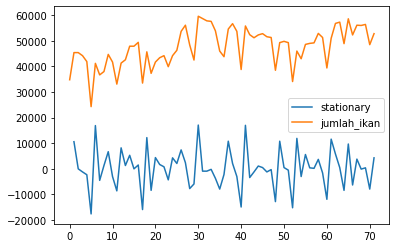

In [26]:
df[['stationary','jumlah_ikan']].plot()

In [27]:
df=df.reset_index()

In [28]:
df.columns

Index(['index', 'jumlah_ikan', 'exps', 'desps', 'stationary'], dtype='object')

In [29]:
df.columns = ['period', 'jumlah_ikan', 'exps', 'desps', 'stationary']

In [30]:
len(df)*0.8

57.6

In [31]:
dfMLP = pd.DataFrame()
dfMLP = df[['jumlah_ikan']]
dfMLP['min1'] = df['jumlah_ikan'].shift(1)
dfMLP['min2'] = df['jumlah_ikan'].shift(2)
dfMLP['min3'] = df['jumlah_ikan'].shift(3)
dfMLP['min4'] = df['jumlah_ikan'].shift(4)
dfMLP['min5'] = df['jumlah_ikan'].shift(5)
dfMLP['min6'] = df['jumlah_ikan'].shift(6)
dfMLP.dropna(how='any', inplace=True)
dfMLP

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,jumlah_ikan,min1,min2,min3,min4,min5,min6
6,41200,24300.0,41900.0,44200.0,45400.0,45400.0,34800.0
7,36700,41200.0,24300.0,41900.0,44200.0,45400.0,45400.0
8,38000,36700.0,41200.0,24300.0,41900.0,44200.0,45400.0
9,44700,38000.0,36700.0,41200.0,24300.0,41900.0,44200.0
10,41700,44700.0,38000.0,36700.0,41200.0,24300.0,41900.0
...,...,...,...,...,...,...,...
67,56100,52300.0,58600.0,48900.0,57300.0,56800.0,51000.0
68,56000,56100.0,52300.0,58600.0,48900.0,57300.0,56800.0
69,56400,56000.0,56100.0,52300.0,58600.0,48900.0,57300.0
70,48500,56400.0,56000.0,56100.0,52300.0,58600.0,48900.0


In [32]:
len(dfMLP)*0.8

52.800000000000004

In [33]:
dfMLP['jumlah_ikan']

6     41200
7     36700
8     38000
9     44700
10    41700
      ...  
67    56100
68    56000
69    56400
70    48500
71    52800
Name: jumlah_ikan, Length: 66, dtype: int64

In [34]:
X = dfMLP.drop('jumlah_ikan',axis=1)
y = dfMLP['jumlah_ikan']

In [35]:
Xtrain,Xtest,ytrain,ytest = X[:52],X[52:],y[:52],y[52:]

In [36]:
from sklearn.neural_network import MLPRegressor

In [37]:
mlp = MLPRegressor()
mlp.fit(Xtrain,ytrain)

MLPRegressor()

In [38]:
yhat = mlp.predict(Xtest)

In [39]:
yhat

array([52321.06775061, 54836.35133245, 55865.60793905, 53879.42701949,
       55634.01140808, 56987.36206262, 60268.53068553, 56520.47019713,
       60070.82489379, 60490.20534622, 63616.91829887, 61135.37832468,
       63167.91452629, 60752.4698124 ])

In [40]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [41]:
mean_absolute_error(ytest,yhat)

6108.622625738187

In [42]:
mean_squared_error(ytest,yhat)


61840275.82239128

In [43]:
mean_absolute_percentage_error(ytest,yhat)

12.486177084290821

In [44]:
res = ytest.to_frame()

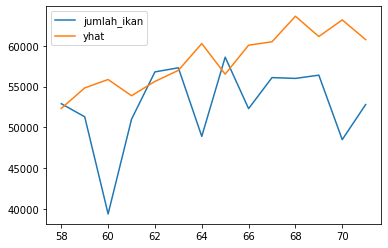

In [45]:
res['yhat'] = yhat
res.plot()

In [46]:
res

,jumlah_ikan,yhat
58,52900,52321.067751
59,51300,54836.351332
60,39400,55865.607939
61,51000,53879.427019
62,56800,55634.011408
63,57300,56987.362063
64,48900,60268.530686
65,58600,56520.470197
66,52300,60070.824894
67,56100,60490.205346


In [47]:
dfnew = df[['jumlah_ikan']]
dfnew = dfnew.append(res,ignore_index = True)

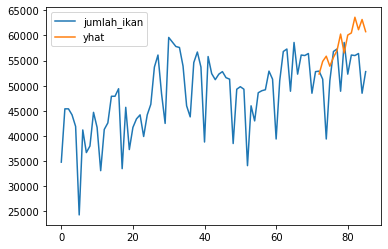

In [48]:
dfnew.plot()

In [49]:
dfMLP.tail(1)

,jumlah_ikan,min1,min2,min3,min4,min5,min6
71,52800,48500.0,56400.0,56000.0,56100.0,52300.0,58600.0


In [50]:
dfMLP.tail(1).to_numpy()[:,1:]

array([[48500., 56400., 56000., 56100., 52300., 58600.]])

In [51]:
bulan71 = mlp.predict(dfMLP.tail(1).to_numpy()[:,1:])
bulan71

array([60752.4698124])

In [52]:
bulan72 = mlp.predict(np.array([[60408.58834328,48500., 56400., 56000., 56100., 52300.]]))
bulan72

array([63490.06513212])

In [53]:
bulan73 = mlp.predict(np.array([[60477.65767776,60408.58834328,48500., 56400., 56000., 56100.]]))
bulan73

array([63616.79177703])

In [54]:
bulan73 = mlp.predict(np.array([[61975.95046632,60477.65767776,60408.58834328,48500., 56400., 56000.]]))
bulan73

array([66789.58862928])

=========================== end ====================================

In [55]:
Xtest

,min1,min2,min3,min4,min5,min6
58,49200.0,49000.0,48600.0,43000.0,46000.0,34100.0
59,52900.0,49200.0,49000.0,48600.0,43000.0,46000.0
60,51300.0,52900.0,49200.0,49000.0,48600.0,43000.0
61,39400.0,51300.0,52900.0,49200.0,49000.0,48600.0
62,51000.0,39400.0,51300.0,52900.0,49200.0,49000.0
63,56800.0,51000.0,39400.0,51300.0,52900.0,49200.0
64,57300.0,56800.0,51000.0,39400.0,51300.0,52900.0
65,48900.0,57300.0,56800.0,51000.0,39400.0,51300.0
66,58600.0,48900.0,57300.0,56800.0,51000.0,39400.0
67,52300.0,58600.0,48900.0,57300.0,56800.0,51000.0


In [56]:
yhat

array([52321.06775061, 54836.35133245, 55865.60793905, 53879.42701949,
       55634.01140808, 56987.36206262, 60268.53068553, 56520.47019713,
       60070.82489379, 60490.20534622, 63616.91829887, 61135.37832468,
       63167.91452629, 60752.4698124 ])

In [57]:
ytest

58    52900
59    51300
60    39400
61    51000
62    56800
63    57300
64    48900
65    58600
66    52300
67    56100
68    56000
69    56400
70    48500
71    52800
Name: jumlah_ikan, dtype: int64

In [58]:
from matplotlib.pyplot import plot

In [59]:
Xtrain

,min1,min2,min3,min4,min5,min6
6,24300.0,41900.0,44200.0,45400.0,45400.0,34800.0
7,41200.0,24300.0,41900.0,44200.0,45400.0,45400.0
8,36700.0,41200.0,24300.0,41900.0,44200.0,45400.0
9,38000.0,36700.0,41200.0,24300.0,41900.0,44200.0
10,44700.0,38000.0,36700.0,41200.0,24300.0,41900.0
11,41700.0,44700.0,38000.0,36700.0,41200.0,24300.0
12,33100.0,41700.0,44700.0,38000.0,36700.0,41200.0
13,41300.0,33100.0,41700.0,44700.0,38000.0,36700.0
14,42600.0,41300.0,33100.0,41700.0,44700.0,38000.0
15,47900.0,42600.0,41300.0,33100.0,41700.0,44700.0


In [60]:
ytrain

6     41200
7     36700
8     38000
9     44700
10    41700
11    33100
12    41300
13    42600
14    47900
15    47900
16    49400
17    33500
18    45700
19    37300
20    41700
21    43400
22    44200
23    39900
24    44200
25    46300
26    53700
27    56100
28    48400
29    42500
30    59600
31    58700
32    57800
33    57600
34    53900
35    46000
36    43800
37    54600
38    56700
39    53700
40    38800
41    55800
42    52400
43    51200
44    52300
45    52800
46    51600
47    51300
48    38500
49    49300
50    49800
51    49300
52    34100
53    46000
54    43000
55    48600
56    49000
57    49200
Name: jumlah_ikan, dtype: int64

In [61]:
Xtest

,min1,min2,min3,min4,min5,min6
58,49200.0,49000.0,48600.0,43000.0,46000.0,34100.0
59,52900.0,49200.0,49000.0,48600.0,43000.0,46000.0
60,51300.0,52900.0,49200.0,49000.0,48600.0,43000.0
61,39400.0,51300.0,52900.0,49200.0,49000.0,48600.0
62,51000.0,39400.0,51300.0,52900.0,49200.0,49000.0
63,56800.0,51000.0,39400.0,51300.0,52900.0,49200.0
64,57300.0,56800.0,51000.0,39400.0,51300.0,52900.0
65,48900.0,57300.0,56800.0,51000.0,39400.0,51300.0
66,58600.0,48900.0,57300.0,56800.0,51000.0,39400.0
67,52300.0,58600.0,48900.0,57300.0,56800.0,51000.0


In [62]:
np.array(ytest)

array([52900, 51300, 39400, 51000, 56800, 57300, 48900, 58600, 52300,
       56100, 56000, 56400, 48500, 52800])

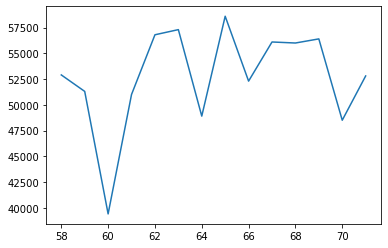

In [63]:
plot(ytest)

In [64]:
y

6     41200
7     36700
8     38000
9     44700
10    41700
      ...  
67    56100
68    56000
69    56400
70    48500
71    52800
Name: jumlah_ikan, Length: 66, dtype: int64

In [65]:
ytest

58    52900
59    51300
60    39400
61    51000
62    56800
63    57300
64    48900
65    58600
66    52300
67    56100
68    56000
69    56400
70    48500
71    52800
Name: jumlah_ikan, dtype: int64

In [66]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



In [67]:
mean_absolute_error(ytest,yhat)

6108.622625738187

In [68]:
mean_absolute_error(ytest,yhat)
mean_squared_error(ytest,yhat)
mean_absolute_percentage_error(ytest,yhat)

12.486177084290821

In [69]:
mean_absolute_percentage_error(ytest,yhat)

12.486177084290821

In [70]:
df.tail()

,period,jumlah_ikan,exps,desps,stationary
67,67,56100,53705.342557,54386.313224,3800.0
68,68,56000,55142.137023,55406.429701,-100.0
69,69,56400,55656.854809,56108.318344,400.0
70,70,48500,56102.741924,56728.390844,-7900.0
71,71,52800,51541.096769,54545.589869,4300.0


In [71]:
tahun2019 = [*range(72,84)]
tahun2019

[72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83]

In [72]:
dfpredict = df 
dfpredict['period'] = df['period'].append(pd.Series(tahun2019,index=tahun2019))

In [73]:
df2019 = pd.Series(tahun2019,index=tahun2019).to_frame()
df2019.columns=["period"]
df2019

,period
72,72
73,73
74,74
75,75
76,76
77,77
78,78
79,79
80,80
81,81


In [ ]:
df2019['jumlah_ikan'] = yhat
df2019

In [ ]:
len(df)

In [ ]:
# Simple Exponential Smoothing
fit1 = ExponentialSmoothing(df).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = ExponentialSmoothing(df).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = ExponentialSmoothing(df).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

In [ ]:
fit2.fittedvalues

In [ ]:
#prediksi taun depan

In [ ]:
dfMLP.tail()